# K-近邻算法（K Nearest Neighbor, KNN）

## 概述

KNN采用测量不同特征值之间的距离方法来进行分类。  
KNN算法的核心思想是如果一个样本在特征空间中的k个最相邻的样本中的大多数属于某一个类别，则该样本也属于这个类别，并具有这个类别上样本的特性。  
> **优点** ：精度高、对异常值不敏感、无数据输入假定  
> **缺点** ：计算复杂度高、空间复杂度高  
> **适用数据范围**： 数值型和标称型  

## 算法流程

1. 收集数据
2. 准备数据：距离计算所需要的数值，最好是结构化的数据格式
3. 分析数据：可以适用任何方法
4. 训练算法：此步骤不适用于KNN
5. 测试算法：计算错误率
6. 使用算法：首先需要输入样本数据和结构化的输出结果，然后运行k-近邻算法判定输入数据分别属于哪个分类，最后应用对计算出的分类执行后续的处理

## KNN算法

对未知类别属性的数据集种的每个点依次执行以下步骤：
1. 计算已知类别属性的数据集中的每个点与当前点之间的距离
2. 按照距离递增次序排序
3. 选取与当前点距离最小的k个点
4. 确定前k个点所在类别的出现频率
5. 返回前k个点出现频率最高的类别作为当前点的预测分类

In [175]:
import numpy as np
import operator

def createDataSet():
    '''构造数据集'''
    dataSet = np.array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return dataSet, labels

def classify0(inX, dataSet, labels, k):
    '''
    KNN算法
    :param inX: 用于分类的输入向量
    :param dataSet: 训练样本集
    :param labels: 训练标签向量
    :param k: 选取最近邻居的数量
    :return k个邻居里频率最高的分类
    '''
    # 为了计算输入向量与其余向量的距离，构造输入向量的矩阵，矩阵的行数为训练样本行数，列数为1
    matrix = np.tile(inX, (dataSet.shape[0], 1))
    # 通过向量计算输入向量与每个样本向量的欧式距离
    sq_distance = (matrix - dataSet) ** 2
    sum_distance = sq_distance.sum(axis=1)
    distance = sum_distance ** 0.5
    # 对距离进行按照由小到大的顺序进行排序，并返回原对象的索引
    sorted_distance_index = distance.argsort()
    
    class_count = {}
    for i in range(k):
        # 返回距离最近的第i个样本所对应的标签
        vote_label = labels[sorted_distance_index[i]]
        # 统计标签所出现的频率
        class_count[vote_label] = class_count.get(vote_label, 0) + 1
    # 根据class_count的频率由大到小排序
    sorted_distance_index = sorted(class_count.iteritems(), key=operator.itemgetter(1), reverse=True)
    # 返回频率最大的Label
    return sorted_distance_index[0][0]

添加测试代码：

In [177]:
dataSet, lables = createDataSet()
classify0([1, 1], dataSet, labels, 3)

'A'

# 约会网站示例

### 加载并解析数据
将文本数据拆分为特征值矩阵及对应的分类标签列表

In [222]:
def file2matrix(filename):
    '''
    加载并解析数据文本文件
    :param filename: 文件名
    :return: 特征值矩阵， 分类标签列表
    '''
    #读取文件，并转换为行文本数组
    array_of_lines = open(filename).readlines()
    #文件行数
    num_of_lines = len(array_of_lines)

    #构造返回矩阵，行数为文本行数，列数为3列。3列的原因是文本中有3个特征值
    return_matrix = np.zeros((num_of_lines, 3))
    class_label_vector = []
    index = 0
    #遍历文本
    for line in array_of_lines:
        #移除字符串头尾空格，并按制表符拆分
        list_from_line = line.strip().split('\t')
        # 赋值返回矩阵为数据特征值
        return_matrix[index, :] = list_from_line[0: 3]
        # 将分类标签添加至列表
        class_label_vector.append(int(list_from_line[-1]))
        index += 1
    
    return return_matrix, class_label_vector

### 制作散点图
根据游戏时间和冰淇淋消耗数制作散点图

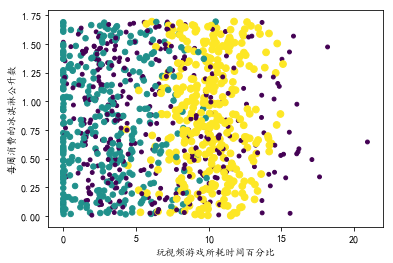

In [253]:
dating_data, dating_labels = file2matrix('datingTestSet2.txt')

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']
plt.figure()
ax = plt.subplot(111)
ax.scatter(dating_data[:, 1], dating_data[:, 2], 15.0*np.array(dating_labels), 15.0*np.array(dating_labels))
ax.set_xlabel(u'玩视频游戏所耗时间百分比')
ax.set_ylabel(u'每周消费的冰淇淋公升数')

上图为带有样本分类标签的约会数据散点图。虽然能够比较容易地区分数据点所属类别，但依然很难根据这张图得出结论性信息

### 归一化特征值
算记录时，差值最大的特征值对计算结果的影响最大。为了处理不同取值范围的特征值时，通常采用将数值归一化的方法，如将取值范围处理为0到1或-1到1之间。下面的公式可以将任意取值范围的特征值转化为0到1区间内的值：
$$newValue = (oldValue-min)/(max-min)$$

In [281]:
def autoNorm(dataSet):
    '''
    归一化特征值
    :param dataSet: 数据集
    :return 归一化后的数据集， 列的差值范围， 列的最小值
    '''
    # 列的最小值
    min_vals = dataSet.min(0)
    # 列的最大值
    max_vals = dataSet.max(0)
    # 列的差值范围
    ranges = max_vals - min_vals
    # 构造返回矩阵
    normalize_dataset = np.zeros(np.shape(dataSet))
    # oldValue - min
    normalize_dataset = dataSet - np.tile(min_vals, (dataSet.shape[0], 1))
    # (oldValue - min) / (max - min)
    normalize_dataset = normalize_dataset / np.tile(ranges, (dataSet.shape[0], 1))
    return normalize_dataset, ranges, min_vals

归一化测试

In [284]:
norm_matrics, ranges, min_vals = autoNorm(dating_data)
print norm_matrics

[[ 0.44832535  0.39805139  0.56233353]
 [ 0.15873259  0.34195467  0.98724416]
 [ 0.28542943  0.06892523  0.47449629]
 ..., 
 [ 0.29115949  0.50910294  0.51079493]
 [ 0.52711097  0.43665451  0.4290048 ]
 [ 0.47940793  0.3768091   0.78571804]]
